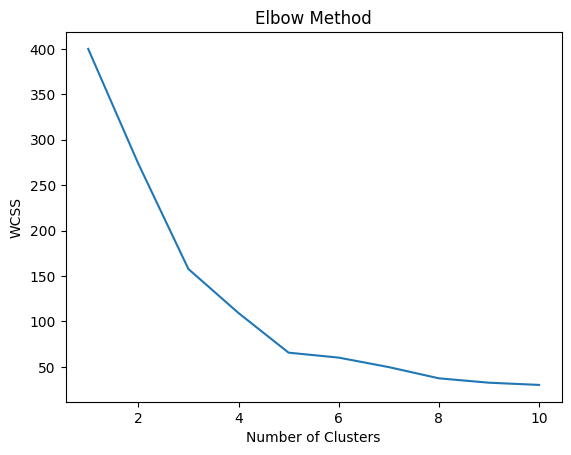

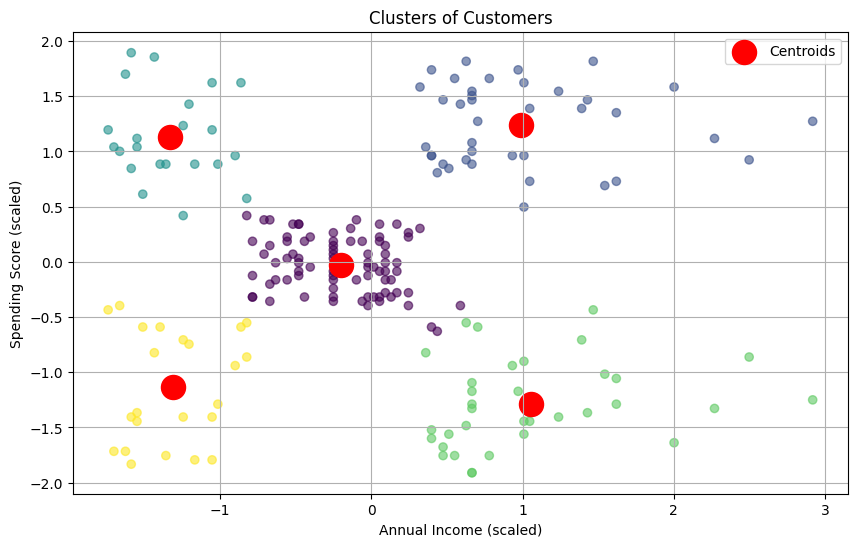

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Step 1: Load the data
data = pd.read_csv("C:\\Users\\Lingesh\\OneDrive\\Desktop\\ML Intern\\archive\\Mall_Customers.csv")

# Step 2: Data Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = imputer.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Step 3: Select Features
X = scaled_data

# Step 4: Choose the Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 5: Apply K-means Clustering
k = 5  # Choose the number of clusters based on elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Step 6: Visualize the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.6)  # Plot data points with cluster colors
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')  # Plot centroids
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()


# Step 7: Interpret the Clusters
data['cluster'] = clusters
# Exclude non-numeric columns before computing the mean
numeric_data = data.select_dtypes(include='number')
cluster_means = numeric_data.groupby('cluster').mean()
print(cluster_means)
